In [ ]:
!pip install keras==2.0.8
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 276kB 8.7MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
2.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==1.13.1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 92.6MB 51kB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 3.2MB 45.2MB/s 
     |████████████████████████████████| 368kB 43.9MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


In [ ]:
!pip install keras==2.0.8
import keras as keras
print(keras.__version__)

     |████████████████████████████████| 276kB 7.5MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


Using TensorFlow backend.


2.0.8


In [ ]:
import sys
print(sys.version)

3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn import metrics

#tf.compat.v1.enable_eager_execution()

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [ ]:
df = pd.DataFrame()
for i in range(10):
    df_tmp = pd.read_csv('/content/drive/My Drive/HARDataset/Participant_' + str(i+1) + '.csv', header=1)
    
    df = pd.concat([df, df_tmp])

# View top 5 rows of dataframe
df.head()

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Unnamed: 13,time_stamp.1,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Unnamed: 27,time_stamp.2,Ax.2,Ay.2,Az.2,Lx.2,Ly.2,Lz.2,Gx.2,Gy.2,Gz.2,Mx.2,My.2,Mz.2,Unnamed: 41,time_stamp.3,Ax.3,Ay.3,Az.3,Lx.3,Ly.3,Lz.3,Gx.3,Gy.3,Gz.3,Mx.3,My.3,Mz.3,Unnamed: 55,time_stamp.4,Ax.4,Ay.4,Az.4,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,Unnamed: 69
0,1.390000e+12,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.23976,12.72,40.74,-6.00,NaN,1.390000e+12,-1.19860,-13.852,3.7865,-1.76980,-4.0625,3.89850,-3.6255,1.07390,0.13622,18.84,55.92,-6.72,NaN,1.390000e+12,0.17706,-10.569,1.8251,-7.5051,-4.7736,-0.062476,-0.36652,1.27060,-0.52412,-30.30,31.08,3.96,NaN,1.390000e+12,2.79220,-12.5720,-4.3177,-0.098712,-3.385700,-2.46480,0.021075,1.02990,1.22690,-18.72,31.74,17.82,NaN,1.390000e+12,4.3177,-2.36990,-0.43585,-5.3574,-0.95749,0.318860,0.52565,-0.18815,0.285880,-22.20,6.48,4.56,walking
1,1.390000e+12,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.40745,12.54,40.74,-6.78,NaN,1.390000e+12,-2.38360,-16.590,2.9965,-2.70250,-6.7890,2.86820,-3.4899,0.39034,0.40073,18.60,55.86,-6.06,NaN,1.390000e+12,0.16344,-12.190,2.0703,-7.3573,-6.2618,-0.042442,-0.54459,1.28070,0.34025,-31.02,29.88,3.36,NaN,1.390000e+12,2.38360,-10.9920,-4.6037,-0.404440,-1.774500,-2.74830,0.201890,0.53573,1.32280,-18.84,31.74,17.70,NaN,1.390000e+12,5.1213,-2.19290,-0.70826,-4.5352,-0.67629,0.081656,0.43616,0.16371,0.198230,-21.90,7.14,5.34,walking
2,1.390000e+12,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.29230,12.42,40.68,-8.10,NaN,1.390000e+12,-4.63090,-16.603,2.0703,-4.34550,-6.8081,1.68890,-3.3851,-1.99200,1.12280,18.72,55.80,-4.26,NaN,1.390000e+12,0.57205,-12.626,2.2474,-6.7655,-6.5138,0.017921,-0.70952,1.15820,0.99724,-31.26,29.22,3.24,NaN,1.390000e+12,1.56630,-9.0848,-4.5764,-1.003600,0.201530,-2.75150,0.287720,0.10049,1.20710,-19.02,31.68,17.52,NaN,1.390000e+12,5.6116,-2.12480,-1.26670,-4.0408,-0.55974,-0.523690,0.32284,0.43127,0.211970,-21.60,7.50,5.64,walking
3,1.390000e+12,-0.69464,-12.939,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.00820,0.34972,12.30,40.74,-8.52,NaN,1.390000e+12,-4.78070,-16.453,1.1577,-4.19540,-6.6731,0.74084,-3.1017,-3.04390,0.79138,18.84,55.62,-3.12,NaN,1.390000e+12,1.21220,-12.476,2.2882,-5.9716,-6.1990,0.016760,-0.78191,1.10200,1.33380,-31.44,28.80,3.24,NaN,1.390000e+12,-0.61292,-8.5263,-2.9284,-2.827100,0.859490,-1.14670,0.175930,-0.21441,0.90469,-18.96,31.86,17.22,NaN,1.390000e+12,6.0611,-1.47100,-2.47890,-3.5908,0.15795,-1.880200,0.20403,0.72846,0.164930,-21.12,8.40,6.12,walking
4,1.390000e+12,0.87170,-12.000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.65485,0.22724,12.24,40.80,-8.88,NaN,1.390000e+12,-0.92618,-12.190,-1.0624,-0.18116,-2.4144,-1.28500,-2.7587,-4.46020,0.69364,19.38,55.44,-0.84,NaN,1.390000e+12,2.24740,-11.387,1.9886,-4.6603,-4.8230,-0.329740,-0.82436,0.90561,2.15600,-31.56,28.32,3.30,NaN,1.390000e+12,-1.18500,-9.3436,-2.2337,-3.209900,0.085583,-0.45569,-0.033292,-0.48625,0.60720,-18.84,32.10,17.04,NaN,1.390000e+12,7.7091,-0.77636,-3.54130,-1.9450,0.85796,-2.995300,0.09896,0.94379,0.064752,-20.94,8.70,6.30,walking


In [ ]:
df_down = pd.DataFrame()
for i in range(468):
    df_tmp = pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/DOWNSTAIRS/DOWNSTAIRS (' + str(i+1) + ').csv', header=0)
    if df_tmp.shape[0]<325:
      df_tmp=df_tmp.iloc[25:len(df_tmp)-25]
    elif df_tmp.shape[0]>=325 and df_tmp.shape[0]<400:
      df_tmp=df_tmp.iloc[50:len(df_tmp)-75]
    elif df_tmp.shape[0]>=400:
      df_tmp=df_tmp.iloc[100:len(df_tmp)-100]
  
    df_tmp=df_tmp.iloc[:df_tmp.shape[0]-df_tmp.shape[0]%50]
    df_down=df_down.append(df_tmp)

# View top 5 rows of dataframe
df_down.head()

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,LinearX,LinearY,LinearZ,Activity,Name,Gender,Age
50,2020-06-21 21:13:15.445,0.969652,-11.001357,0.367510,-2.547308,-0.383623,-0.359189,0.635509,-0.782115,1.733094,DOWNSTAIRS,mesutkoldas-cep,MALE,22
51,2020-06-21 21:13:15.465,4.127604,-8.311471,1.657985,-2.058616,-2.003638,0.624304,0.635509,-0.782115,1.733094,DOWNSTAIRS,mesutkoldas-cep,MALE,22
52,2020-06-21 21:13:15.484,3.014300,-7.602787,2.184709,-0.040317,-2.399479,0.486249,0.635509,-0.782115,1.733094,DOWNSTAIRS,mesutkoldas-cep,MALE,22
53,2020-06-21 21:13:15.504,1.036689,-7.693767,-0.190339,0.273668,-0.361632,-0.307876,0.635509,-0.782115,1.733094,DOWNSTAIRS,mesutkoldas-cep,MALE,22
54,2020-06-21 21:13:15.525,0.033519,-7.498640,0.061052,-0.080634,-0.090408,-0.505796,0.635509,-0.782115,1.733094,DOWNSTAIRS,mesutkoldas-cep,MALE,22


In [ ]:
df_down.to_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/DOWN.csv')

In [ ]:
df_up = pd.DataFrame()
for i in range(493):
    df_tmp = pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/UPSTAIRS/UPSTAIRS (' + str(i+1) + ').csv', header=0)
    if df_tmp.shape[0]<325:
      df_tmp=df_tmp.iloc[25:len(df_tmp)-25]
    elif df_tmp.shape[0]>=325 and df_tmp.shape[0]<400:
      df_tmp=df_tmp.iloc[50:len(df_tmp)-75]
    elif df_tmp.shape[0]>=400:
      df_tmp=df_tmp.iloc[100:len(df_tmp)-100]
  
    df_tmp=df_tmp.iloc[:df_tmp.shape[0]-df_tmp.shape[0]%50]
    df_up=df_up.append(df_tmp)

# View top 5 rows of dataframe
df_up.head()
df_up.shape

(109550, 14)

In [ ]:
df_up.to_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/UP.csv')

In [ ]:
df_walk = pd.DataFrame()
for i in range(62):
    df_tmp = pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/WALKING/WALKING (' + str(i+1) + ').csv', header=0)  
    df_tmp=df_tmp.iloc[250:df_tmp.shape[0]-df_tmp.shape[0]%200-250]
    df_walk=df_walk.append(df_tmp)

# View top 5 rows of dataframe
display(df_walk.head())
df_walk.shape

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,LinearX,LinearY,LinearZ,Activity,Name,Gender,Age
250,2020-06-13 20:39:26.598,-0.391452,2.560599,10.708067,-0.069639,-0.265116,-0.002443,-0.130593,0.817771,1.061053,WALKING,emrekv-el,MALE,22
251,2020-06-13 20:39:26.618,0.051475,2.701857,11.067198,-0.072082,-0.238237,-0.040317,0.286496,0.924363,1.425846,WALKING,emrekv-el,MALE,22
252,2020-06-13 20:39:26.639,0.462081,2.662352,11.538856,-0.111177,-0.194255,-0.152716,0.573817,0.887128,1.788489,WALKING,emrekv-el,MALE,22
253,2020-06-13 20:39:26.658,0.889446,2.491167,11.869255,-0.186925,-0.095295,-0.316428,1.012913,0.760807,2.183362,WALKING,emrekv-el,MALE,22
254,2020-06-13 20:39:26.678,0.693121,1.878251,12.097901,-0.266337,-0.004887,-0.464258,0.765170,-0.056346,2.510173,WALKING,emrekv-el,MALE,22


(348800, 14)

In [ ]:
df_walk.to_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/WALK.csv')

In [ ]:
df_run = pd.DataFrame()
for i in range(56):
    df_tmp = pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/RUNNING/RUNNING (' + str(i+1) + ').csv', header=0)  
    df_tmp=df_tmp.iloc[250:df_tmp.shape[0]-df_tmp.shape[0]%200-250]
    df_run=df_run.append(df_tmp)

# View top 5 rows of dataframe
display(df_run.head())
df_run.shape

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,LinearX,LinearY,LinearZ,Activity,Name,Gender,Age
250,2020-06-14 05:06:07.434,-5.827487,1.709460,0.632069,0.298102,1.342682,0.885755,2.634329,-2.929020,-1.115064,RUNNING,Hazarb-el,MALE,22
251,2020-06-14 05:06:07.459,-7.223307,2.706645,11.699266,0.097738,1.695762,1.253496,2.682774,-2.172245,5.946127,RUNNING,Hazarb-el,MALE,22
252,2020-06-14 05:06:07.468,-8.298303,3.408146,11.736377,0.252898,2.239432,1.521054,0.533687,-0.774421,9.370862,RUNNING,Hazarb-el,MALE,22
253,2020-06-14 05:06:07.494,-6.222530,8.368932,9.716867,0.252898,1.409877,2.327397,3.524319,6.551510,7.616582,RUNNING,Hazarb-el,MALE,22
254,2020-06-14 05:06:07.514,0.292093,10.960655,25.480291,-0.190590,-0.316428,1.958434,6.302240,5.137583,23.706186,RUNNING,Hazarb-el,MALE,22


(288200, 14)

In [ ]:
df_run.to_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/RUN.csv')

In [ ]:
df_sit = pd.DataFrame()
for i in range(33):
    df_tmp = pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/SITTING/SITTING (' + str(i+1) + ').csv', header=0)  
    df_tmp=df_tmp.iloc[250:df_tmp.shape[0]-df_tmp.shape[0]%200-250]
    df_sit=df_sit.append(df_tmp)

# View top 5 rows of dataframe
display(df_sit.head())
df_sit.shape

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,LinearX,LinearY,LinearZ,Activity,Name,Gender,Age
250,2020-06-22 08:21:43.43,0.869095,-1.604115,-9.569624,0.001222,0.002443,0.000000,0.017214,0.044650,0.060551,VEHICLE,emin,MALE,23
251,2020-06-22 08:21:43.449,0.861913,-1.619677,-9.558850,-0.002443,0.001222,0.000000,0.012258,0.021634,0.082128,VEHICLE,emin,MALE,23
252,2020-06-22 08:21:43.468,0.849942,-1.641225,-9.545682,-0.001222,0.002443,-0.001222,0.020391,0.013012,0.074967,VEHICLE,emin,MALE,23
253,2020-06-22 08:21:43.489,0.845153,-1.634043,-9.560047,-0.001222,0.000000,-0.002443,-0.005036,0.015238,0.072563,VEHICLE,emin,MALE,23
254,2020-06-22 08:21:43.508,0.842759,-1.630451,-9.560047,0.000000,0.003665,-0.004887,-0.005244,0.003114,0.078572,VEHICLE,emin,MALE,23


(179500, 14)

In [ ]:
df_sit.to_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/SIT.csv')

In [ ]:
df_stand = pd.DataFrame()
for i in range(30):
    df_tmp = pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/STANDING/STANDING (' + str(i+1) + ').csv', header=0)  
    df_tmp=df_tmp.iloc[250:df_tmp.shape[0]-df_tmp.shape[0]%200-250]
    df_stand=df_stand.append(df_tmp)

# View top 5 rows of dataframe
display(df_stand.head())
df_stand.shape

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,LinearX,LinearY,LinearZ,Activity,Name,Gender,Age
250,2020-06-22 08:00:22.45,1.614889,-9.587581,-0.889446,0.074526,0.078191,0.058643,0.438907,-0.68503,1.029964,STANDING,caneryalcn,MALE,22
251,2020-06-22 08:00:22.47,1.576582,-9.273940,-0.702698,0.036652,-0.007330,0.040317,0.438907,-0.68503,1.029964,STANDING,caneryalcn,MALE,22
252,2020-06-22 08:00:22.491,1.335965,-9.580399,-0.748188,-0.004887,0.017104,-0.014661,0.438907,-0.68503,1.029964,STANDING,caneryalcn,MALE,22
253,2020-06-22 08:00:22.512,1.412579,-9.575610,-0.701501,-0.007330,0.006109,-0.026878,0.438907,-0.68503,1.029964,STANDING,caneryalcn,MALE,22
254,2020-06-22 08:00:22.528,1.525106,-9.533711,-0.630872,-0.001222,0.017104,-0.024435,0.438907,-0.68503,1.029964,STANDING,caneryalcn,MALE,22


(180200, 14)

In [ ]:
df_stand.to_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/STAND.csv')

In [ ]:
df_nodata = pd.DataFrame()
for i in range(2):
    df_tmp = pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/NODATA/NODATA (' + str(i+1) + ').csv', header=0)  
    df_tmp=df_tmp.iloc[250:df_tmp.shape[0]-df_tmp.shape[0]%200-250]
    df_nodata=df_nodata.append(df_tmp)

# View top 5 rows of dataframe
display(df_nodata.head())
df_nodata.shape

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,LinearX,LinearY,LinearZ,Activity,Name,Gender,Age
250,2020-06-22 06:37:33.72,-0.010774,0.050278,9.671378,-0.002443,0.001222,-0.001222,-0.007834,-0.000093,-0.136312,SLEEPING,nodata,MALE,1
251,2020-06-22 06:37:33.74,0.004788,0.043096,9.671378,0.002443,-0.002443,-0.001222,0.004245,-0.014675,-0.121946,SLEEPING,nodata,MALE,1
252,2020-06-22 06:37:33.761,-0.002394,0.045490,9.671378,-0.001222,0.002443,-0.001222,0.011212,-0.004109,-0.132719,SLEEPING,nodata,MALE,1
253,2020-06-22 06:37:33.781,0.008380,0.041899,9.679757,0.001222,-0.002443,-0.001222,0.000657,-0.007592,-0.133916,SLEEPING,nodata,MALE,1
254,2020-06-22 06:37:33.8,-0.011971,0.045490,9.664195,0.001222,-0.001222,0.000000,0.003051,-0.009987,-0.133916,SLEEPING,nodata,MALE,1


(237600, 14)

In [ ]:
df_nodata.to_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/NODATA.csv')

In [ ]:
df_walk=pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/WALK.csv', header=0)
df_run=pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/RUN.csv')
df_sit=pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/SIT.csv')
df_stand=pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/STAND.csv')
df_nodata=pd.read_csv('/content/drive/My Drive/SeniorProject494/LASTDATA/MERGED/NODATA.csv')
del df_walk['Unnamed: 0']
del df_run['Unnamed: 0']
del df_sit['Unnamed: 0']
del df_stand['Unnamed: 0']
del df_nodata['Unnamed: 0']



In [ ]:
cols = df_walk.columns.tolist()
cols = cols[1:4]+cols[7:10]+cols[4:7]
label_walk = df_walk.iloc[:,10] 
label_walk = label_walk.to_frame()
label_walk.columns=['Activity_Label']
df_walk = df_walk[cols]
df_walk.head()

,AccX,AccY,AccZ,LinearX,LinearY,LinearZ,GyroX,GyroY,GyroZ
0,-0.391452,2.560599,10.708067,-0.130593,0.817771,1.061053,-0.069639,-0.265116,-0.002443
1,0.051475,2.701857,11.067198,0.286496,0.924363,1.425846,-0.072082,-0.238237,-0.040317
2,0.462081,2.662352,11.538856,0.573817,0.887128,1.788489,-0.111177,-0.194255,-0.152716
3,0.889446,2.491167,11.869255,1.012913,0.760807,2.183362,-0.186925,-0.095295,-0.316428
4,0.693121,1.878251,12.097901,0.765170,-0.056346,2.510173,-0.266337,-0.004887,-0.464258


In [ ]:
df_walk.columns = ['Ax', 'Ay', 'Az', 'Lx', 'Ly', 'Lz', 'Gx', 'Gy', 'Gz']
split_point = int(len(df_walk) * 0.8)
train_X_walk = df_walk.iloc[:split_point, :]
test_X_walk = df_walk.iloc[split_point:, :]
train_y_walk = label_walk.iloc[:split_point, :]
test_y_walk = label_walk.iloc[split_point:, :]

print("Number of train samples: ", len(train_X_walk))
print("Number of test samples: ", len(test_X_walk))

Number of train samples:  279040
Number of test samples:  69760


In [ ]:
cols = df_run.columns.tolist()
cols = cols[1:4]+cols[7:10]+cols[4:7]
label_run = df_run.iloc[:,10] 
label_run = label_run.to_frame()
label_run.columns=['Activity_Label']

df_run = df_run[cols]
df_run

,AccX,AccY,AccZ,LinearX,LinearY,LinearZ,GyroX,GyroY,GyroZ
0,-5.827487,1.709460,0.632069,2.634329,-2.929020,-1.115064,0.298102,1.342682,0.885755
1,-7.223307,2.706645,11.699266,2.682774,-2.172245,5.946127,0.097738,1.695762,1.253496
2,-8.298303,3.408146,11.736377,0.533687,-0.774421,9.370862,0.252898,2.239432,1.521054
3,-6.222530,8.368932,9.716867,3.524319,6.551510,7.616582,0.252898,1.409877,2.327397
4,0.292093,10.960655,25.480291,6.302240,5.137583,23.706186,-0.190590,-0.316428,1.958434
...,...,...,...,...,...,...,...,...,...
288195,3.141193,-2.959233,-11.641806,1.561706,6.620266,-11.887055,-0.675617,-1.018923,-0.285885
288196,-4.432865,-3.313575,-6.562507,-6.297396,6.821046,-1.724747,-2.279749,-1.700649,-0.261450
288197,-6.515820,-2.099715,2.794033,-6.354448,7.454144,3.724899,-2.419026,-1.339017,0.188146
288198,-4.619612,-3.439271,-1.466449,-5.457509,6.701074,1.662047,-1.986534,-0.273668,0.602313


In [ ]:
df_run.columns = ['Ax', 'Ay', 'Az', 'Lx', 'Ly', 'Lz', 'Gx', 'Gy', 'Gz']
split_point = int(len(df_run) * 0.8)
train_X_run = df_run.iloc[:split_point, :]
test_X_run = df_run.iloc[split_point:, :]
train_y_run = label_run.iloc[:split_point, :]
test_y_run = label_run.iloc[split_point:, :]

print("Number of train samples: ", len(train_X_run))
print("Number of test samples: ", len(test_X_run))

Number of train samples:  230560
Number of test samples:  57640


In [ ]:
cols = df_stand.columns.tolist()
cols = cols[1:4]+cols[7:10]+cols[4:7]
label_stand = df_stand.iloc[:,10] 
label_stand = label_stand.to_frame()
label_stand.columns=['Activity_Label']
df_stand = df_stand[cols]
df_stand

,AccX,AccY,AccZ,LinearX,LinearY,LinearZ,GyroX,GyroY,GyroZ
0,1.614889,-9.587581,-0.889446,0.438907,-0.685030,1.029964,0.074526,0.078191,0.058643
1,1.576582,-9.273940,-0.702698,0.438907,-0.685030,1.029964,0.036652,-0.007330,0.040317
2,1.335965,-9.580399,-0.748188,0.438907,-0.685030,1.029964,-0.004887,0.017104,-0.014661
3,1.412579,-9.575610,-0.701501,0.438907,-0.685030,1.029964,-0.007330,0.006109,-0.026878
4,1.525106,-9.533711,-0.630872,0.438907,-0.685030,1.029964,-0.001222,0.017104,-0.024435
...,...,...,...,...,...,...,...,...,...
180195,2.031480,-9.483433,0.175974,-0.025188,0.142029,0.101893,0.043982,-0.152716,0.067195
180196,1.904588,-9.473856,0.180762,-0.169872,0.096546,0.121546,0.064752,-0.167377,0.062308
180197,1.681927,-9.487024,0.094571,-0.414687,0.092762,0.049698,0.052534,-0.139277,0.020769
180198,1.496376,-9.532514,0.044293,-0.616495,0.051999,0.042722,0.042761,-0.070860,0.034208


In [ ]:
df_stand.columns = ['Ax', 'Ay', 'Az', 'Lx', 'Ly', 'Lz', 'Gx', 'Gy', 'Gz']
split_point = int(len(df_stand) * 0.8)
train_X_stand = df_stand.iloc[:split_point, :]
test_X_stand = df_stand.iloc[split_point:, :]
train_y_stand = label_stand.iloc[:split_point, :]
test_y_stand = label_stand.iloc[split_point:, :]

print("Number of train samples: ", len(train_X_stand))
print("Number of test samples: ", len(test_X_stand))

Number of train samples:  144160
Number of test samples:  36040


In [ ]:
cols = df_sit.columns.tolist()
cols = cols[1:4]+cols[7:10]+cols[4:7]
label_sit = df_sit.iloc[:,10] 
label_sit = label_sit.to_frame()
label_sit.columns=['Activity_Label']
label_sit.loc[(label_sit['Activity_Label'] == 'VEHICLE')] = 'SITTING'
df_sit = df_sit[cols]
label_sit.head()

,Activity_Label
0,SITTING
1,SITTING
2,SITTING
3,SITTING
4,SITTING


In [ ]:
df_sit.columns = ['Ax', 'Ay', 'Az', 'Lx', 'Ly', 'Lz', 'Gx', 'Gy', 'Gz']
split_point = int(len(df_stand) * 0.8)
train_X_sit = df_sit.iloc[:split_point, :]
test_X_sit = df_sit.iloc[split_point:, :]
train_y_sit = label_sit.iloc[:split_point, :]
test_y_sit = label_sit.iloc[split_point:, :]

print("Number of train samples: ", len(train_X_sit))
print("Number of test samples: ", len(test_X_sit))

Number of train samples:  144160
Number of test samples:  35340


In [ ]:
cols = df_nodata.columns.tolist()
cols = cols[1:4]+cols[7:10]+cols[4:7]
label_nodata = df_nodata.iloc[:,10] 
label_nodata = label_nodata.to_frame()
label_nodata.columns=['Activity_Label']
label_nodata.loc[(label_nodata['Activity_Label'] == 'SLEEPING')] = 'SITTING'
df_nodata = df_nodata[cols]
label_nodata.head()

,Activity_Label
0,SITTING
1,SITTING
2,SITTING
3,SITTING
4,SITTING


In [ ]:
df_nodata.columns = ['Ax', 'Ay', 'Az', 'Lx', 'Ly', 'Lz', 'Gx', 'Gy', 'Gz']
split_point = int(len(df_stand) * 0.8)
train_X_nodata = df_nodata.iloc[:split_point, :]
test_X_nodata = df_nodata.iloc[split_point:, :]
train_y_nodata = label_nodata.iloc[:split_point, :]
test_y_nodata = label_nodata.iloc[split_point:, :]

print("Number of train spamples: ", len(train_X_nodata))
print("Number of test spamples: ", len(test_X_nodata))

Number of train spamples:  144160
Number of test spamples:  93440


In [ ]:
train_X = pd.DataFrame()
train_y = pd.DataFrame()
test_X = pd.DataFrame()
test_y = pd.DataFrame()

#train_X = train_X.append(train_X_down)
#train_X = train_X.append(train_X_up)
train_X = train_X.append(train_X_walk)
train_X = train_X.append(train_X_run)
train_X = train_X.append(train_X_stand)
train_X = train_X.append(train_X_sit)
train_X = train_X.append(train_X_nodata)
#train_y = train_y.append(train_y_down)
#train_y = train_y.append(train_y_up)
train_y = train_y.append(train_y_walk)
train_y = train_y.append(train_y_run)
train_y = train_y.append(train_y_stand)
train_y = train_y.append(train_y_sit)
train_y = train_y.append(train_y_nodata)
#test_X = test_X.append(test_X_down)
#test_X = test_X.append(test_X_up)
test_X = test_X.append(test_X_walk)
test_X = test_X.append(test_X_run)
test_X = test_X.append(test_X_stand)
test_X = test_X.append(test_X_sit)
test_X = test_X.append(test_X_nodata)
#test_y = test_y.append(test_y_down)
#test_y = test_y.append(test_y_up)
test_y = test_y.append(test_y_walk)
test_y = test_y.append(test_y_run)
test_y = test_y.append(test_y_stand)
test_y = test_y.append(test_y_sit)
test_y = test_y.append(test_y_nodata)



In [ ]:
train_X["MA"] = np.sqrt(np.square(train_X['Ax']) + np.square(train_X['Ay']) + np.square(train_X['Az']))
train_X["ML"] = np.sqrt(np.square(train_X['Lx']) + np.square(train_X['Ly']) + np.square(train_X['Lz']))
train_X["MG"] = np.sqrt(np.square(train_X['Gx']) + np.square(train_X['Gy']) + np.square(train_X['Gz']))
test_X["MA"] = np.sqrt(np.square(test_X['Ax']) + np.square(test_X['Ay']) + np.square(test_X['Az']))
test_X["ML"] = np.sqrt(np.square(test_X['Lx']) + np.square(test_X['Ly']) + np.square(test_X['Lz']))
test_X["MG"] = np.sqrt(np.square(test_X['Gx']) + np.square(test_X['Gy']) + np.square(test_X['Gz']))

train_X.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,MA,ML,MG
0,-0.391452,2.560599,10.708067,-0.130593,0.817771,1.061053,-0.069639,-0.265116,-0.002443,11.016923,1.345971,0.274120
1,0.051475,2.701857,11.067198,0.286496,0.924363,1.425846,-0.072082,-0.238237,-0.040317,11.392346,1.723242,0.252148
2,0.462081,2.662352,11.538856,0.573817,0.887128,1.788489,-0.111177,-0.194255,-0.152716,11.851027,2.077247,0.270957
3,0.889446,2.491167,11.869255,1.012913,0.760807,2.183362,-0.186925,-0.095295,-0.316428,12.160438,2.524260,0.379669
4,0.693121,1.878251,12.097901,0.765170,-0.056346,2.510173,-0.266337,-0.004887,-0.464258,12.262441,2.624810,0.535252


In [ ]:
df.rename(columns={'Unnamed: 69':'Activity_Label'} , inplace=True)
df = df[df.Activity_Label=='biking']
df.head()

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Unnamed: 13,time_stamp.1,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Unnamed: 27,time_stamp.2,Ax.2,Ay.2,Az.2,Lx.2,Ly.2,Lz.2,Gx.2,Gy.2,Gz.2,Mx.2,My.2,Mz.2,Unnamed: 41,time_stamp.3,Ax.3,Ay.3,Az.3,Lx.3,Ly.3,Lz.3,Gx.3,Gy.3,Gz.3,Mx.3,My.3,Mz.3,Unnamed: 55,time_stamp.4,Ax.4,Ay.4,Az.4,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,Activity_Label
36000,1.390000e+12,4.2495,-4.0861,-5.2575,-0.19316,3.14300,-0.34084,-0.55528,0.43799,-0.10721,-31.62,22.68,16.20,NaN,1.390000e+12,-3.7320,-3.3097,-8.2812,-0.319010,0.84621,-0.080556,0.015272,0.29658,-0.83139,11.76,39.72,32.28,NaN,1.390000e+12,3.5277,-0.31327,-8.1995,0.45771,-0.036463,-0.30440,0.007941,-0.34147,-0.99418,-24.66,9.66,24.66,NaN,1.390000e+12,5.2030,-8.3357,-0.98067,-1.2231,-1.047700,0.346510,0.68142,-0.67440,-0.018326,-19.44,33.24,-13.14,NaN,1.390000e+12,10.7600,0.408610,-3.4459,1.21710,-0.073585,-1.23940,0.36835,0.49450,0.18173,-22.92,-11.04,-34.44,biking
36001,1.390000e+12,4.1406,-4.1951,-4.3994,-0.35291,2.96260,0.57517,-0.50671,-0.12370,-0.26145,-31.56,22.38,16.14,NaN,1.390000e+12,-3.6366,-3.1191,-8.1450,-0.362900,1.09350,0.083475,0.034208,0.38943,-0.87812,11.04,39.48,32.46,NaN,1.390000e+12,4.9306,-1.22580,-9.2482,0.80878,-0.224510,-0.40635,0.212580,-0.11851,-0.78130,-24.78,8.58,25.14,NaN,1.390000e+12,5.0940,-8.0905,-0.92618,-1.3089,-0.779270,0.385140,0.66065,-0.50091,0.003971,-19.56,33.18,-13.14,NaN,1.390000e+12,10.8550,0.422230,-3.3915,1.17020,0.005035,-1.30360,0.46181,0.60476,0.41142,-20.82,-13.02,-32.16,biking
36002,1.390000e+12,3.9771,-6.1836,-5.8159,-0.59146,0.84097,-0.72146,-0.50305,0.17013,-0.54275,-31.62,22.08,16.14,NaN,1.390000e+12,-2.9965,-3.4187,-8.0360,0.159510,0.84583,0.211650,0.109340,0.31673,-0.98074,10.62,39.24,32.46,NaN,1.390000e+12,6.2381,-3.10540,-9.8748,2.10140,-2.098000,-1.04060,0.174100,-0.16952,-0.81886,-24.66,8.16,25.32,NaN,1.390000e+12,4.9306,-7.4367,-1.08960,-1.4328,-0.081821,0.168850,0.66981,-0.41111,-0.032070,-19.74,32.94,-13.26,NaN,1.390000e+12,10.8150,-0.054481,-3.0646,1.21540,-0.382610,-1.08520,0.49602,0.71227,0.52473,-19.98,-13.86,-31.02,biking
36003,1.390000e+12,4.0589,-6.4424,-7.2733,-0.56653,0.51688,-2.14060,-0.75045,0.49480,-0.67501,-31.74,22.02,16.20,NaN,1.390000e+12,-2.9284,-3.1191,-8.3493,0.038182,1.23510,-0.078153,0.133470,0.43738,-1.01400,10.02,39.18,32.28,NaN,1.390000e+12,5.9249,-3.56850,-9.6568,1.77840,-2.542700,-0.82930,0.133170,-0.18204,-0.89309,-24.60,7.74,25.50,NaN,1.390000e+12,5.1076,-7.6002,-1.34840,-1.2190,-0.203880,-0.148840,0.59254,-0.29505,0.084910,-19.86,32.76,-13.50,NaN,1.390000e+12,10.7330,-0.286030,-2.6968,1.11960,-0.557490,-0.77768,0.46273,0.70158,0.50916,-19.26,-14.64,-30.00,biking
36004,1.390000e+12,2.9692,-7.1507,-6.0883,-1.80380,-0.42520,-0.78206,-1.16130,-0.20159,-0.76083,-32.04,21.60,16.20,NaN,1.390000e+12,-3.0237,-3.3097,-8.3493,-0.129190,1.07240,-0.067452,0.202810,0.55314,-1.02410,9.48,38.94,32.34,NaN,1.390000e+12,2.0839,-3.14630,-7.7908,-2.03740,-2.140200,1.05070,0.060781,0.10660,-0.86315,-24.66,6.96,25.80,NaN,1.390000e+12,4.9850,-7.7091,-1.14410,-1.3190,-0.289540,0.030466,0.49541,-0.27367,0.267860,-19.98,32.64,-13.56,NaN,1.390000e+12,9.3844,-1.048800,-2.2474,0.41158,-1.169000,-0.55096,0.24526,0.82131,0.39034,-18.12,-16.02,-27.96,biking


In [ ]:
split_point = int(len(df) * 0.8)
train_cyc = df.iloc[:split_point, :]
test_cyc = df.iloc[split_point:, :]

print("Number of train samples: ", len(train_cyc))
print("Number of test samples: ", len(test_cyc))

Number of train samples:  72000
Number of test samples:  18000


In [ ]:
def concat(data):
    
    left_pocket = data.iloc[:,1:10]
    left_pocket["MA"] = np.sqrt(np.square(left_pocket['Ax']) + np.square(left_pocket['Ay']) + np.square(left_pocket['Az']))
    left_pocket["ML"] = np.sqrt(np.square(left_pocket['Lx']) + np.square(left_pocket['Ly']) + np.square(left_pocket['Lz']))
    left_pocket["MG"] = np.sqrt(np.square(left_pocket['Gx']) + np.square(left_pocket['Gy']) + np.square(left_pocket['Gz']))
    
    right_pocket = data.iloc[:,15:24]
    right_pocket.columns=['Ax', 'Ay', 'Az', 'Lx', 'Ly', 'Lz', 'Gx', 'Gy', 'Gz']
    
    right_pocket["MA"] = np.sqrt(np.square(right_pocket['Ax']) + np.square(right_pocket['Ay']) + np.square(right_pocket['Az']))
    right_pocket["ML"] = np.sqrt(np.square(right_pocket['Lx']) + np.square(right_pocket['Ly']) + np.square(right_pocket['Lz']))
    right_pocket["MG"] = np.sqrt(np.square(right_pocket['Gx']) + np.square(right_pocket['Gy']) + np.square(right_pocket['Gz']))

    
    labels = data.iloc[:, 69] 
    labels = labels.to_frame()
    labels.columns=['Activity_Label']
    labels.loc[(labels['Activity_Label'] == 'biking')] = 'BIKING'
    labels = pd.concat([labels]*2, ignore_index=True)
    
    frames = [left_pocket, right_pocket]
    df = pd.concat(frames)
   
    return df, labels

train_X_cyc, train_y_cyc = concat(train_cyc)
test_X_cyc, test_y_cyc = concat(test_cyc)

In [ ]:
train_X_cyc.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,MA,ML,MG
36000,4.2495,-4.0861,-5.2575,-0.19316,3.14300,-0.34084,-0.55528,0.43799,-0.10721,7.899099,3.167322,0.715308
36001,4.1406,-4.1951,-4.3994,-0.35291,2.96260,0.57517,-0.50671,-0.12370,-0.26145,7.355145,3.038481,0.583449
36002,3.9771,-6.1836,-5.8159,-0.59146,0.84097,-0.72146,-0.50305,0.17013,-0.54275,9.374376,1.256010,0.759329
36003,4.0589,-6.4424,-7.2733,-0.56653,0.51688,-2.14060,-0.75045,0.49480,-0.67501,10.529961,2.273827,1.124118
36004,2.9692,-7.1507,-6.0883,-1.80380,-0.42520,-0.78206,-1.16130,-0.20159,-0.76083,9.849673,2.011494,1.402896


In [ ]:
test_y_cyc

,Activity_Label
0,BIKING
1,BIKING
2,BIKING
3,BIKING
4,BIKING
...,...
35995,BIKING
35996,BIKING
35997,BIKING
35998,BIKING


In [ ]:
train_X.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,MA,ML,MG
0,-0.391452,2.560599,10.708067,-0.130593,0.817771,1.061053,-0.069639,-0.265116,-0.002443,11.016923,1.345971,0.274120
1,0.051475,2.701857,11.067198,0.286496,0.924363,1.425846,-0.072082,-0.238237,-0.040317,11.392346,1.723242,0.252148
2,0.462081,2.662352,11.538856,0.573817,0.887128,1.788489,-0.111177,-0.194255,-0.152716,11.851027,2.077247,0.270957
3,0.889446,2.491167,11.869255,1.012913,0.760807,2.183362,-0.186925,-0.095295,-0.316428,12.160438,2.524260,0.379669
4,0.693121,1.878251,12.097901,0.765170,-0.056346,2.510173,-0.266337,-0.004887,-0.464258,12.262441,2.624810,0.535252


In [ ]:
train_X = train_X.append(train_X_cyc)
train_y = train_y.append(train_y_cyc)
test_X = test_X.append(test_X_cyc)
test_y = test_y.append(test_y_cyc)


In [ ]:
test_y

,Activity_Label
279040,WALKING
279041,WALKING
279042,WALKING
279043,WALKING
279044,WALKING
...,...
35995,BIKING
35996,BIKING
35997,BIKING
35998,BIKING


In [ ]:
N_TIME_STEPS = 200 #sliding window length
STEP = 50 #Sliding window step size
N_FEATURES = 12 

def generate_sequence(x, y, n_time_steps, step):
    
    segments = []
    labels = []
    for i in range(0, len(x) - n_time_steps, step):
        ax = x['Ax'].values[i: i + n_time_steps]
        ay = x['Ay'].values[i: i + n_time_steps]
        az = x['Az'].values[i: i + n_time_steps]

        lx = x['Lx'].values[i: i + n_time_steps]
        ly = x['Ly'].values[i: i + n_time_steps]
        lz = x['Lz'].values[i: i + n_time_steps]
        
        gx = x['Gx'].values[i: i + n_time_steps]
        gy = x['Gy'].values[i: i + n_time_steps]
        gz = x['Gz'].values[i: i + n_time_steps]

        MA = x['MA'].values[i: i + n_time_steps]
        ML = x['ML'].values[i: i + n_time_steps]
        MG = x['MG'].values[i: i + n_time_steps]
       
        label = stats.mode(y['Activity_Label'][i: i + n_time_steps])[0][0]
        segments.append([ax, ay, az, lx, ly, lz, gx, gy, gz, MA, ML, MG])
        #segments.append([MA, ML, MG])
        labels.append(label)
        
    return segments, labels

train_X, train_y = generate_sequence(train_X, train_y, N_TIME_STEPS, STEP)
test_X, test_y = generate_sequence(test_X, test_y, N_TIME_STEPS, STEP)

In [ ]:
# reshape input segments and one-hot encode labels
def reshape_segments(x, y, n_time_steps, n_features):
    
    x_reshaped = np.asarray(x, dtype= np.float32).reshape(-1, n_time_steps, n_features)
    y_reshaped = np.asarray(pd.get_dummies(y), dtype = np.float32)
    return x_reshaped, y_reshaped

X_train, y_train = reshape_segments(train_X, train_y, N_TIME_STEPS, N_FEATURES)
X_test, y_test = reshape_segments(test_X, test_y, N_TIME_STEPS, N_FEATURES)


In [ ]:
X_test

array([[[-0.89543146, -1.30484   , -1.4413095 , ..., -1.1312603 ,
         -2.4779987 , -6.528988  ],
        [-6.341043  , -8.186973  , -1.8531121 , ...,  0.130484  ,
         -0.16160862, -0.45489833],
        [ 0.31124622,  0.32800564, -0.6332663 , ..., -0.90381116,
         -1.3096284 ,  0.14963761],
        ...,
        [ 1.5712062 ,  1.3576224 ,  1.3649087 , ...,  1.032102  ,
          0.9594023 ,  0.39884213],
        [ 0.7713852 ,  1.0287    ,  1.3353039 , ...,  2.651224  ,
          4.216219  ,  4.137994  ],
        [ 3.15095   ,  3.306831  ,  2.3045616 , ...,  0.923018  ,
          1.0653399 ,  1.0152618 ]],

       [[-1.7669208 , -1.4149733 , -2.7030537 , ...,  0.30645782,
         -0.9624691 , -1.2354081 ],
        [-0.8535329 , -0.9995792 , -1.4820108 , ..., -2.930503  ,
         -0.5590461 , -0.5638345 ],
        [-2.4887726 , -3.8271315 , -4.697424  , ...,  1.8543092 ,
          5.614403  ,  5.0134583 ],
        ...,
        [ 3.4085083 ,  3.5669527 ,  2.4080458 , ...,  

In [ ]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras import optimizers



N_CLASSES = 5
N_HIDDEN_UNITS = 32
L2 = 0.000001

model = Sequential([
    LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
         kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
         bias_regularizer=l2(L2), name="LSTM_1"),
    Flatten(name='Flatten'),
    Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"),
    Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2")
    #Softmax converts a real vector to a vector of categorical probabilities.
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 200, 32)           5760      
_________________________________________________________________
Flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                204832    
_________________________________________________________________
Dense_2 (Dense)              (None, 5)                 165       
Total params: 210,757
Trainable params: 210,757
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = optimizers.RMSprop(lr=0.0001)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

BATCH_SIZE = 512
N_EPOCHS = 30


"""
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "/content/drive/My Drive/SeniorProject494/LASTDATA/CHECKPOINT/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=1)



#Create a new model instance
#model = create_model()

#Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

"""

'\n# Include the epoch in the file name (uses `str.format`)\ncheckpoint_path = "/content/drive/My Drive/SeniorProject494/LASTDATA/CHECKPOINT/cp-{epoch:04d}.ckpt"\ncheckpoint_dir = os.path.dirname(checkpoint_path)\n\n# Create a callback that saves the model\'s weights every 5 epochs\ncp_callback = tf.keras.callbacks.ModelCheckpoint(\n    filepath=checkpoint_path, \n    verbose=1, \n    save_weights_only=True,\n    period=1)\n\n\n\n#Create a new model instance\n#model = create_model()\n\n#Save the weights using the `checkpoint_path` format\nmodel.save_weights(checkpoint_path.format(epoch=0))\n\n'

In [ ]:
# Train the model with the new callback
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 21718 samples, validate on 6561 samples
Epoch 1/30
21718/21718 [==============================] - 35s - loss: 0.5199 - acc: 0.9121 - val_loss: 0.2251 - val_acc: 0.9698
Epoch 2/30
21718/21718 [==============================] - 35s - loss: 0.0789 - acc: 0.9972 - val_loss: 0.1054 - val_acc: 0.9730
Epoch 3/30
21718/21718 [==============================] - 34s - loss: 0.0197 - acc: 0.9991 - val_loss: 0.0748 - val_acc: 0.9744
Epoch 4/30
21718/21718 [==============================] - 34s - loss: 0.0070 - acc: 0.9994 - val_loss: 0.0709 - val_acc: 0.9781
Epoch 5/30
21718/21718 [==============================] - 34s - loss: 0.0035 - acc: 0.9996 - val_loss: 0.0786 - val_acc: 0.9727
Epoch 6/30
21718/21718 [==============================] - 34s - loss: 0.0021 - acc: 0.9997 - val_loss: 0.0902 - val_acc: 0.9704
Epoch 7/30
21718/21718 [==============================] - 34s - loss: 0.0013 - acc: 0.9999 - val_loss: 0.1070 - val_acc: 0.9721
Epoch 8

In [ ]:
test_y[6000]
y_test[6000]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
k=0
for i in range(len(y_test)):
  if y_test[i][0]==1:
    k+=1

k

718

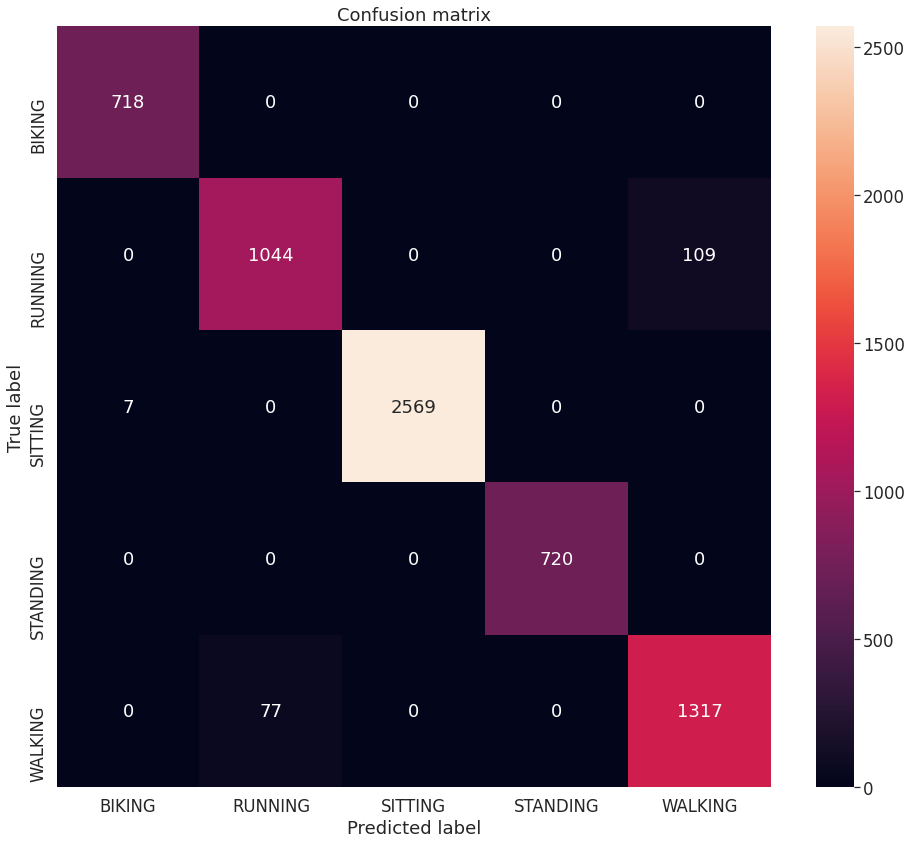

In [ ]:
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

LABELS = ['BIKING', 'RUNNING', 'SITTING' , 'STANDING', 'WALKING']

plt.figure(figsize=(16, 14))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [ ]:
loss, acc = model.evaluate(X_test,  y_test, verbose=2)
print("Model, accuracy: {:5.2f}%".format(100*acc))
100*loss

Model, accuracy: 97.06%


14.971474300124918

In [ ]:
model.save('/content/drive/My Drive/SeniorProject494/LASTDATA/MODELS/my_model-lstm') 

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/SeniorProject494/LASTDATA/MODELS/my_model-lstm')

# Check its architecture
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 200, 32)           5760      
_________________________________________________________________
Flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                204832    
_________________________________________________________________
Dense_2 (Dense)              (None, 5)                 165       
Total params: 210,757
Trainable params: 210,757
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss, acc = new_model.evaluate(X_test,  y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

print(new_model.predict(X_test).shape)

 - 5s - loss: 0.1497 - acc: 0.9706
Restored model, accuracy: 97.06%
(6561, 5)


In [ ]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    for x in unique_list: 
        print(x) 
#y_test[6581]
#test_y[6000]
unique(test_y)

WALKING
RUNNING
STANDING
SITTING
BIKING
